In [ ]:
## XYZ Company has offices in four different zones. The company wishes to investigate the following :
# ● The mean sales generated by each zone.
# ● Total sales generated by all the zones for each month.
# ● Check whether all the zones generate the same amount of sales.
## Help the company to carry out their study with the help of data provided.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dt=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
dt.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
dt.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [8]:
dt.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

###  mean sales generated by each zone.

In [31]:
mean_v=dt[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].mean()


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Mean sales of each zone'}>

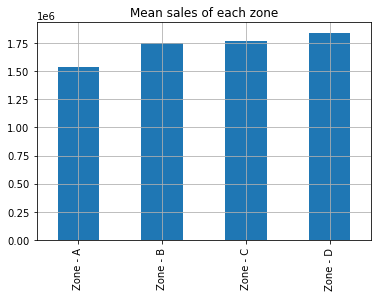

In [37]:
mean_v.plot.bar(grid=True,title='Mean sales of each zone')

### Total sales generated by all the zones for each month

In [30]:
sum=dt.sum(axis=1)
dt['sum']=sum

C:\Users\acer\AppData\Local\Temp\ipykernel_17472\2536481031.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum=dt.sum(axis=1)


In [27]:
dt.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,sum
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [28]:
dt[['Month','sum']]

,Month,sum
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


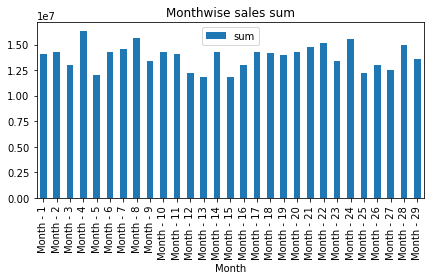

In [39]:
dt[['Month','sum']].plot.bar(x='Month',y='sum',title="Monthwise sales sum")
plt.tight_layout()

### Checking whether all the zones generate the same amount of sales

In [2]:
## Here we use ANOVA for hypothesis testing

In [23]:
## H0:All zones generate same amount of sales(All population means are equal)
## Ha:There is difference in amount of sales of each zone(Atleast one population mean is different from the rest)
## alpha,level of significance=0.05

In [19]:
from scipy.stats import f_oneway
f_oneway(dt['Zone - A'],dt['Zone - B'],dt['Zone - C'],dt['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

In [21]:
## Here pvalue is less than alpha value(0.05).Hence we reject the null hypothesis

In [3]:
## There is differenece in sales amount of each zone.